In [1]:
from Asylum_Research_AFM.Controls.master_panel import *
from Asylum_Research_AFM.Core.Igor_activex_grid import *
from Asylum_Research_AFM.Controls.scans import GridScan
import numpy as np

In [2]:
gridscan = GridScan(numXgridpoints = 60, numYgridpoints = 60)


### Julian copied the 'filename', 'save_path' and 'data_path' variables here to download the data. The below cell only has to be run once and then the data is already downloaded, but these variables have to be defined when it is run

In [2]:
from m3_learning.util.file_IO import download_and_unzip
# Specify the filename and the path to save the file
filename = 'data_raw.h5'
save_path = './../../../Data/2023_rapid_fitting'
data_path = save_path + '/' + filename

# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'



# download the file
download_and_unzip(filename, url, save_path)

downloading data
...100%, 1663 MB, 8382 KB/s, 203 seconds passed

## loads and example dataset

In [5]:
#! pip install m3-learning

  Obtaining dependency information for m3-learning from https://files.pythonhosted.org/packages/11/f9/ba0a13eac57c852614bd001de4f17b2d91b1a489b0de7096a48fa84b78d2/m3_learning-0.0.24-py3-none-any.whl.metadata
  Obtaining dependency information for pyNSID from https://files.pythonhosted.org/packages/2b/f0/9a600f1fbf31307596391d418f10962da62f0b815faea958c6d882b26ec3/pyNSID-0.0.7.2-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 43.7/43.7 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.1 kB ? eta -:--:--
     -------------------------------------- 162.1/162.1 kB 4.9 MB/s eta 0:00:00
  Obtaining dependency information for BGlib from https://files.pythonhosted.org/packages/90/0a/4c91dbb2a523de88a5cf1bb5aa1038f76d9302be62a0633a9c8a3e37f617/BGlib-0.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for hyperspy from https://files.pythonhosted.org/p

In [3]:
from m3_learning.be.dataset import BE_Dataset

# Specify the filename and the path to save the file
filename = 'data_raw.h5'
save_path = './../../../Data/2023_rapid_fitting'
data_path = save_path + '/' + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins = 80)

# print the contents of the file
dataset.print_be_tree()


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data_Reshaped
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
    ├ raw_data_resampled
Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurem

In this dataset

IO_rate_[Hz] : 4000000

BE_center_frequency_[Hz] : 1310000

BE_band_width_[Hz] : 200000

num_bins : 165

BE_repeats : 4

In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file = h5py.File(dataset.dataset, 'r')

# get the BE wave
BE_wave = file["/Measurement_000/Channel_000/Excitation_Waveform"][:]

num_bins = 200


In [5]:
spectroscopic_dims = file["/Measurement_000/Channel_000/Spectroscopic_Values"][:]

In [6]:
spectroscopic_dims.shape

(4, 63360)

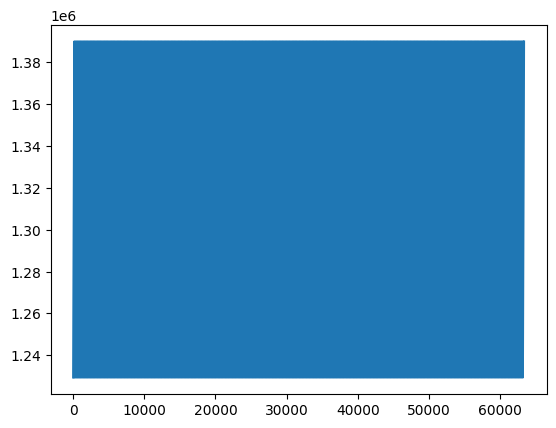

In [7]:
plt.plot(spectroscopic_dims[0])

In [8]:
print(spectroscopic_dims[1])

[ 0.         0.         0.        ... -0.6666667 -0.6666667 -0.6666667]


63360

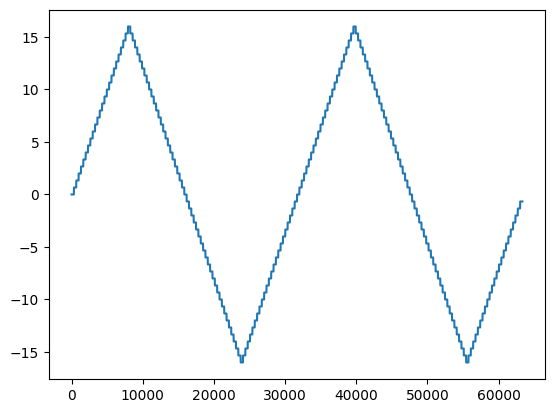

In [9]:
plt.plot(spectroscopic_dims[1])
len(spectroscopic_dims[1])

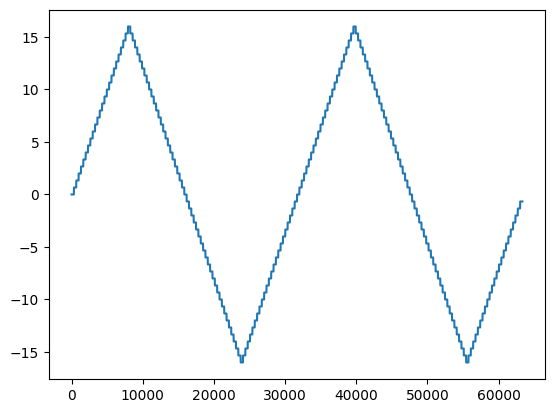

In [10]:
#plt.plot(spectroscopic_dims[1][7700:8500])
plt.plot(spectroscopic_dims[1])


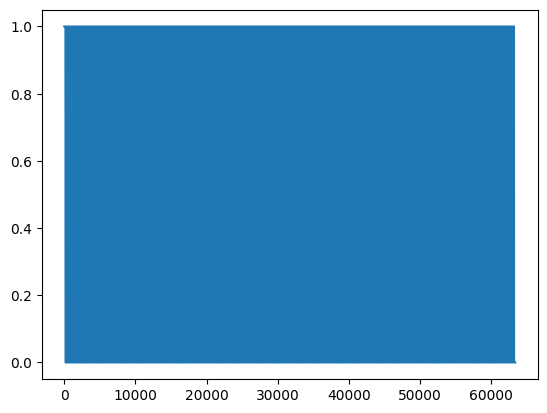

In [11]:
plt.plot(spectroscopic_dims[2])

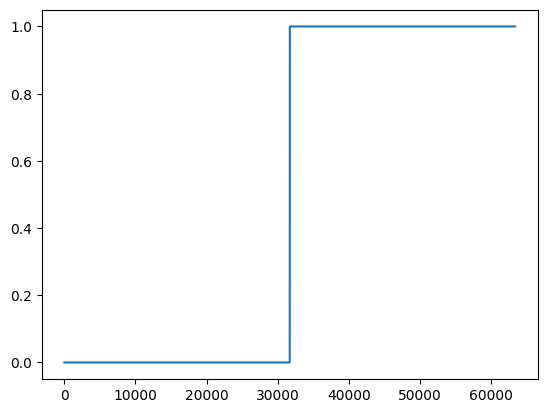

In [12]:
plt.plot(spectroscopic_dims[3])

16384


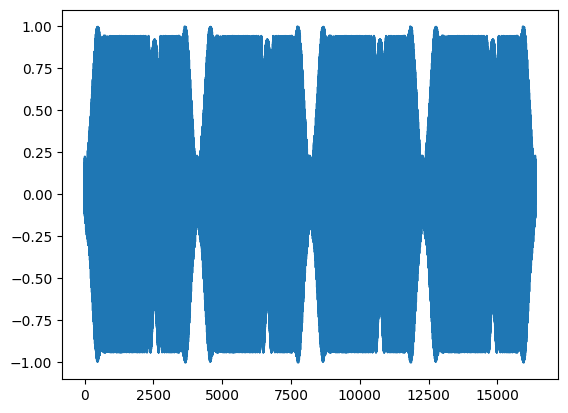

In [13]:
plt.plot(BE_wave)
print(len(BE_wave))

In [14]:
from BandExcitation.File.DataWriter import DataConverter

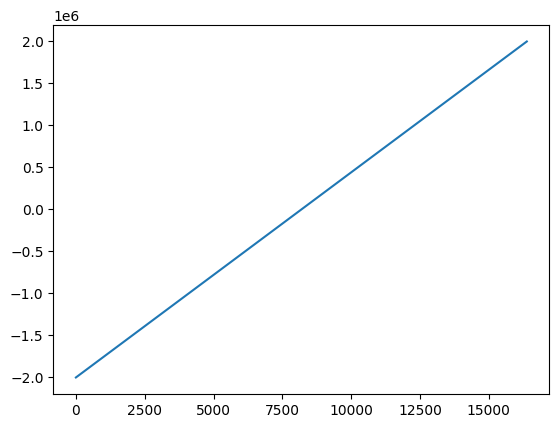

In [15]:
freqs = DataConverter.BE_frequencies(len(BE_wave), 4e6)
plt.plot(freqs)

# what is the purpose of the number of bins in the extract_freq_range function. Why is it needed?
- is it supposed to break up the calculated range into number of bins equal samples?

(1210000.0, 1410000.0)


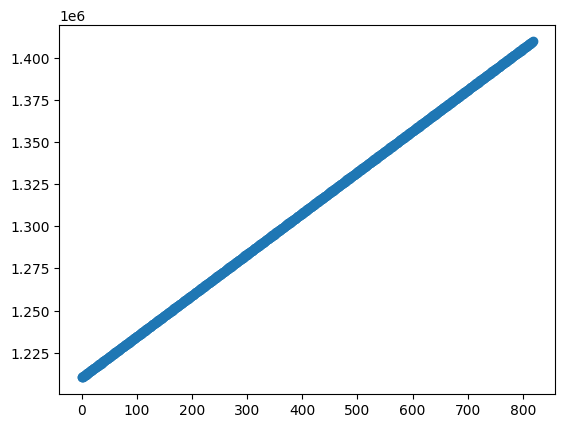

In [16]:
#inds = DataConverter.extract_freq_range(freqs, (1.31e6-200e3/2, 1.31e6+200e3/2), num_bins)
inds = DataConverter.extract_freq_range(freqs, (1.31e6-200e3/2, 1.31e6+200e3/2))

plt.plot(freqs[inds],'o')

In [17]:
binned_freq = DataConverter.BE_bin(freqs[inds], num_bins) #num bins

In [18]:
np.max(binned_freq)

1409423.828125

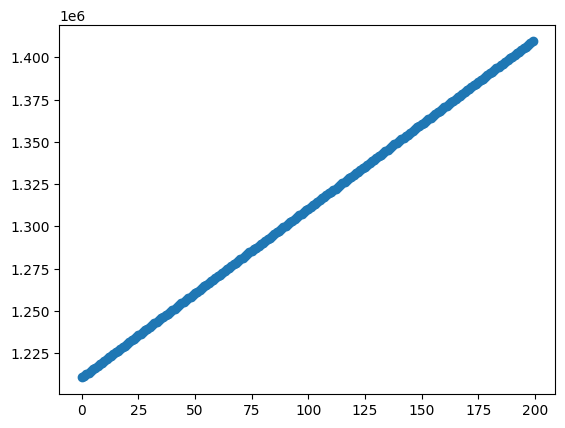

In [19]:
plt.plot(binned_freq, 'o')

In [20]:
BE_FFT = DataConverter.BE_FFT(BE_wave) #num bins

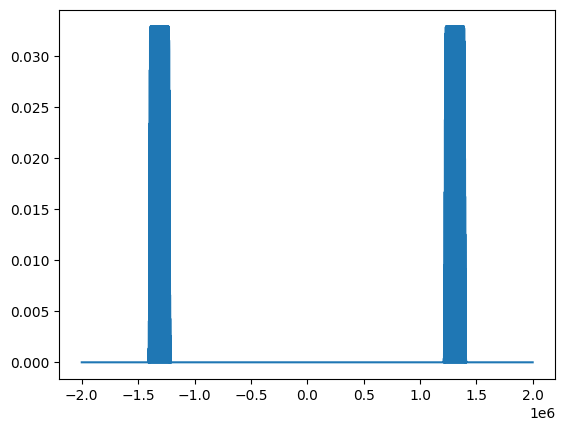

In [21]:
plt.plot(freqs, np.abs(BE_FFT))

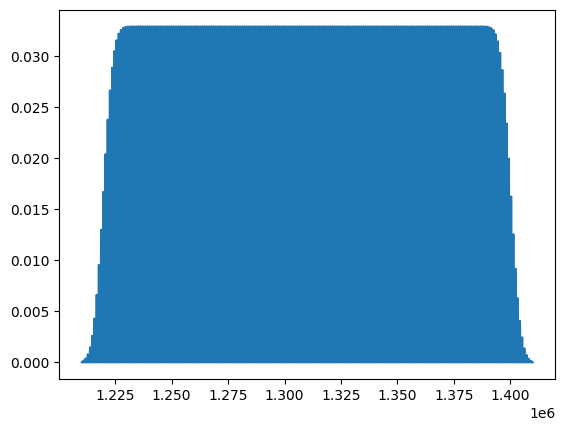

In [22]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))

In [23]:
binned_complex = DataConverter.BE_bin(BE_FFT[inds], num_bins)

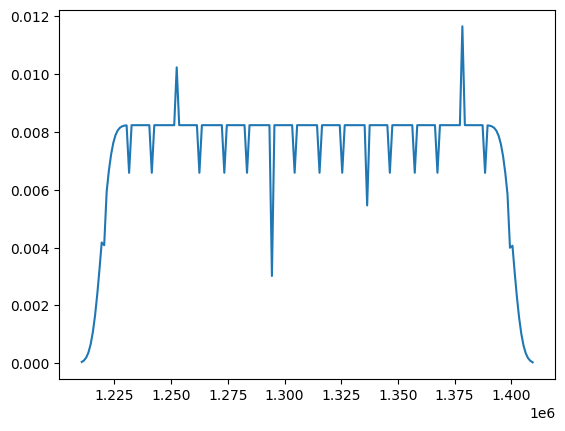

In [24]:
plt.plot(binned_freq, np.abs(binned_complex))

## Try on generated data

In [25]:
import pyUSID as usid
import numpy as np
import sidpy
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [26]:
file_path = 'testing_data.h5'
h5s_file = h5py.File(file_path, mode='w')

In [27]:
h5s_meas_group = sidpy.prov_utils.create_indexed_group(h5s_file, 'Measurement')
h5s_chan_group = sidpy.prov_utils.create_indexed_group(h5s_meas_group, 'Channel')
print(h5s_chan_group)

<HDF5 group "/Measurement_000/Channel_000" (0 members)>


Initializing BEparams
0
(1210000.0, 1410000.0)


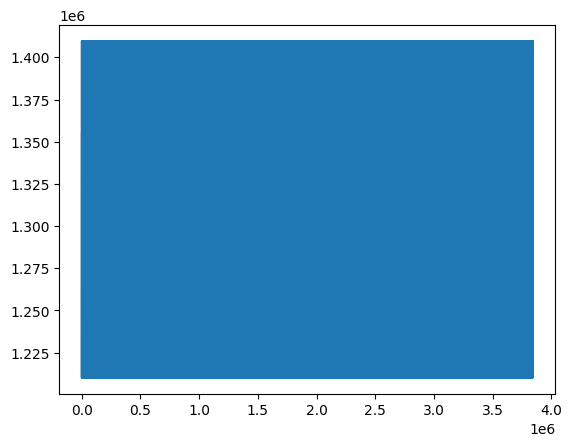

In [28]:
from BandExcitation.Measurement.BEMeasurement import BEMeasurement
from BandExcitation.File.DataWriter import DataConverter

beparms = BEMeasurement(spectroscopic_min_voltage=-4, 
                   spectroscopic_max_voltage=4, 
                   BE_rep=4, 
                   BE_time = 1e-3,
                   AI_sample_rate=4e6, 
                   BE_ppw = 2**15//4,
                   BE_center_freq = 1310000, 
                   BE_bandwidth = 200000, 
                   BE_num_bins = 200,          
                  )

data_converter = DataConverter(beparms)

wave = beparms.get_simulated_BE_measurement()

import matplotlib.pyplot as plt
import numpy as np

plt.plot(data_converter.get_spectroscopic_freq())

# I think the time should be by the entire chirp, thus we should fix this so that the BE_PPW, and BE_Time is divided by the number of reps

In [29]:
sidpy.hdf_utils.write_simple_attrs(h5s_meas_group, {'BE_actual_duration_[s]': 0.004,
                                                'BE_amplitude_[V]': 1,
                                                'BE_auto_smoothing': 'auto smoothing on',
                                                'BE_band_edge_smoothing_[s]' : 4832.1,
                                                'BE_band_edge_trim' : 0.094742,
                                                'BE_band_width_[Hz]' : 200000,
                                                'BE_bins_per_band' : 0,
                                                'BE_center_frequency_[Hz]' : 1310000,
                                                'BE_desired_duration_[s]' : 0.004,
                                                'BE_phase_content' : 'chirp-sinc hybrid',
                                                'BE_phase_variation' : 1,
                                                'BE_points_per_BE_wave' : 0,
                                                'BE_repeats' : 4,
                                                'FORC_V_high1_[V]' : 1,
                                                'FORC_V_high2_[V]' : 10,
                                                'FORC_V_low1_[V]' : -1,
                                                'FORC_V_low2_[V] ': -10,
                                                'FORC_num_of_FORC_cycles' : 1,
                                                'FORC_num_of_FORC_repeats' : 1,
                                                'File_MDAQ_version' : 'MDAQ_VS_090915_01', 
                                                'File_date_and_time' : '18-Sep-2015 18:32:14', 
                                                'File_file_name' : 'SP128_NSO',
                                                'File_file_path' : 'testing',
                                                'File_file_suffix' : 99,
                                                'IO_AO_amplifier' : 10,
                                                'IO_AO_range_[V]' : '+/- 10',
                                                'IO_Analog_Input_1' : '+/- .1V, FFT', 
                                                'IO_Analog_Input_2' : 'off', 
                                                'IO_Analog_Input_3' : 'off',
                                                'IO_Analog_Input_4' : 'off',
                                                'IO_DAQ_platform' : 'NI 6115',
                                                'IO_rate_[Hz]' : 4000000,
                                                'VS_amplitude_[V]' : 16, 
                                                'VS_cycle_fraction' : 'full',
                                                'VS_cycle_phase_shift' : 0,
                                                'VS_measure_in_field_loops' : 'in and out-of-field',
                                                'VS_mode' : 'DC modulation mode',
                                                'VS_number_of_cycles' : 2,
                                                'VS_offset_[V]' : 0,
                                                'VS_read_voltage_[V]' : 0,
                                                'VS_set_pulse_amplitude[V]' : 0,
                                                'VS_set_pulse_duration[s]' : 0.002,
                                                'VS_step_edge_smoothing_[s]' : 0.001,
                                                'VS_steps_per_full_cycle' : 96,
                                                'data_type' : 'BEPSData', 
                                                'grid_/single' : 'grid',
                                                'grid_contact_set_point_[V]' : 1,
                                                'grid_current_col' : 1,
                                                'grid_current_row' : 1,
                                                'grid_cycle_time_[s]' : 10,
                                                'grid_measuring' : 0,
                                                'grid_moving ': 0,
                                                'grid_num_cols' : 60,
                                                'grid_num_rows' : 60,
                                                'grid_settle_time_[s]' : 0.15,
                                                'grid_time_remaining_[h;m;s]' : 10,
                                                'grid_total_time_[h;m;s]' : 10,
                                                'grid_transit_set_point_[V]' : 0.1,
                                                'grid_transit_time_[s]' : 0.15,
                                                'num_bins' : 165,
                                                'num_pix' : 3600,
                                                'num_udvs_steps' : 384})

In [30]:
x = np.linspace(0, 60, 60)
y = np.linspace(0, 60, 60)
freqs_bin = data_converter.binned_freqs
DC_voltage = beparms.be_spectroscopy.DC_waveform
field = np.array([1,0])
cycle = np.array([0,1])

In [31]:
pos_dims = [usid.Dimension('X', 'nm', x),
            usid.Dimension('Y', 'um', y)]
spec_dims = [usid.Dimension('Cycle', '', cycle),
             usid.Dimension('Field', '', field),
             usid.Dimension('DC_Offset', 'V', DC_voltage),
            usid.Dimension('Frequency', 'Hz', freqs_bin) 
             ]

In [32]:
h5_raw = usid.hdf_utils.write_main_dataset(h5s_chan_group,  # parent HDF5 group
                                           (len(x) * len(y), len(freqs_bin)*len(DC_voltage) * len(cycle)*len(field)),  # shape of Main dataset
                                           'Raw_Data',  # Name of main dataset
                                           'Current',  # Physical quantity contained in Main dataset
                                           'nA',  # Units for the physical quantity
                                           pos_dims,  # Position dimensions
                                           spec_dims,  # Spectroscopic dimensions
                                           dtype=np.float32,  # data type / precision
                                           compression='gzip',
                                           main_dset_attrs={'IO_rate': 4E+6, 'Amplifier_Gain': 9})
print(h5_raw)

c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


<HDF5 dataset "Raw_Data": shape (3600, 152000), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 200 
	DC_Offset - size: 190 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	float32


In [33]:
print(h5_raw)

<HDF5 dataset "Raw_Data": shape (3600, 152000), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 200 
	DC_Offset - size: 190 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	float32


In [34]:
h5s_file.close()

In [35]:
data_converter.update_binning(wave)

(1210000.0, 1410000.0)


(1210000.0, 1410000.0)


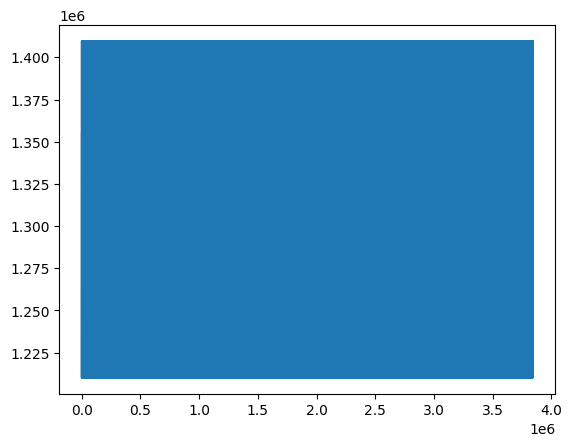

In [36]:
import matplotlib.pyplot as plt

plt.plot(data_converter.get_spectroscopic_freq())

In [38]:
from BandExcitation.Measurement.NI import PXI as pxi

# what exactly is beparams.PXI() supposed to do? Based on the code below and the source code, I assume it should return the waveform, so should I call it with 'function_generator' and 'oscilloscope'? But what are those?

In [39]:
pxi()

TypeError: PXI.__init__() missing 2 required positional arguments: 'function_generator' and 'oscilloscope'

In [37]:
out = beparms.PXI()

TypeError: 'PXI' object is not callable

In [40]:
plt.plot(out[0:16000])

NameError: name 'out' is not defined

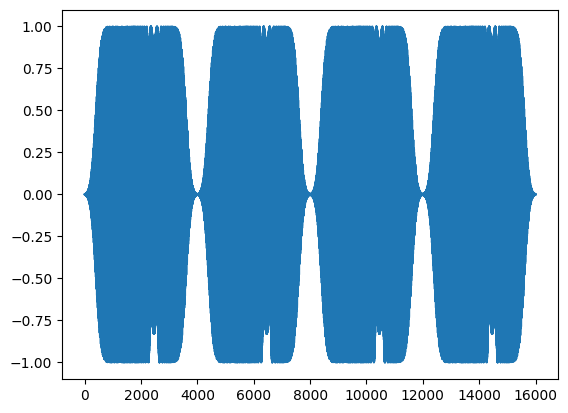

In [41]:
import matplotlib.pyplot as plt
plt.plot(wave)

In [30]:
import numpy as np
BE = data_converter.bin_signal(out[0:16000])

plt.plot(data_converter.binned_freqs, np.abs(BE),'o')

NameError: name 'out' is not defined

In [42]:
import pyUSID as usid

channel = file["/Measurement_000/Channel_000/Raw_Data"]

pd_raw = usid.USIDataset(channel)


print('Desctiption of physical quantity in the Main dataset:')
print(pd_raw.data_descriptor)
print('Position Dimension names and sizes:')
for name, length in zip(pd_raw.pos_dim_labels, pd_raw.pos_dim_sizes):
    print('{} : {}'.format(name, length))
print('Spectroscopic Dimension names and sizes:')
for name, length in zip(pd_raw.spec_dim_labels, pd_raw.spec_dim_sizes):
    print('{} : {}'.format(name, length))
print('Position Dimensions:')
print(pd_raw.pos_dim_descriptors)
print('Spectroscopic Dimensions:')
print(pd_raw.spec_dim_descriptors)

Desctiption of physical quantity in the Main dataset:
Piezoresponse (V)
Position Dimension names and sizes:
Y : 60
X : 60
Spectroscopic Dimension names and sizes:
Frequency : 165
DC_Offset : 96
Field : 2
Cycle : 2
Position Dimensions:
['Y (um)', 'X (um)']
Spectroscopic Dimensions:
['Frequency (Hz)', 'DC_Offset (V)', 'Field ()', 'Cycle ()']


In [43]:
import pyUSID as usid
import sidpy
import numpy as np
import h5py


# all we need are these values to build the file
# Need to flip the order
# then we need to build the atributes in the data writer

x = np.linspace(0, 60, 60)
y = np.linspace(0, 60, 60)
freqs_bin = data_converter.binned_freqs
DC_voltage = beparms.be_spectroscopy.DC_waveform
field = np.array([1,0])
cycle = np.array([0,1])

pos_dims = [usid.Dimension('Cols', 'nm', x),
            usid.Dimension('Rows', 'um', y)]
spec_dims = [usid.Dimension('Frequency', 'Hz', freqs_bin),
             usid.Dimension('DC_Offset', 'V', DC_voltage),
                usid.Dimension('Field', '', field),
             usid.Dimension('Cycle', '', cycle)]




with h5py.File(file_path, mode='w') as h5_file:


SyntaxError: incomplete input (3113016201.py, line 28)

In [44]:
file_path = 'test4.h5'

with h5py.File(file_path, mode='w') as h5_file:
    h5_meas_group = sidpy.prov_utils.create_indexed_group(h5_file, 'Measurement')
    h5_raw = usid.hdf_utils.write_main_dataset(h5_meas_group,  # parent HDF5 group
                                            (len(x) * len(y), len(freqs_bin)*len(DC_voltage) * len(cycle)*len(field)),  # shape of Main dataset
                                            'Raw_Data',  # Name of main dataset
                                            'Current',  # Physical quantity contained in Main dataset
                                            'nA',  # Units for the physical quantity
                                            pos_dims,  # Position dimensions
                                            spec_dims,  # Spectroscopic dimensions
                                            dtype=np.float32,  # data type / precision
                                            compression='gzip',
                                            main_dset_attrs={'IO_rate': 4E+6, 'Amplifier_Gain': 9})
    sidpy.hdf_utils.print_tree(h5_file)
    for dset in [h5_raw, h5_raw.h5_spec_inds, h5_raw.h5_pos_vals]:
        print('Is {} is a Main dataset?: {}'.format(dset.name, usid.hdf_utils.check_if_main(dset)))

c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\Asylum User\anaconda3\envs\afm\Lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


/
├ Measurement_000
  ---------------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
Is /Measurement_000/Raw_Data is a Main dataset?: True
Is /Measurement_000/Spectroscopic_Indices is a Main dataset?: False
Is /Measurement_000/Position_Values is a Main dataset?: False


In [45]:
with h5py.File(file_path, mode='r+') as h5_file:
    pd_raw = h5_file['/Measurement_000/Raw_Data'] #usid.USIDataset(channel)

    pd_raw = usid.USIDataset(pd_raw)

    print('Desctiption of physical quantity in the Main dataset:')
    print(pd_raw.data_descriptor)
    print('Position Dimension names and sizes:')
    for name, length in zip(pd_raw.pos_dim_labels, pd_raw.pos_dim_sizes):
        print('{} : {}'.format(name, length))
    print('Spectroscopic Dimension names and sizes:')
    for name, length in zip(pd_raw.spec_dim_labels, pd_raw.spec_dim_sizes):
        print('{} : {}'.format(name, length))
    print('Position Dimensions:')
    print(pd_raw.pos_dim_descriptors)
    print('Spectroscopic Dimensions:')
    print(pd_raw.spec_dim_descriptors)

Desctiption of physical quantity in the Main dataset:
Current (nA)
Position Dimension names and sizes:
Y : 60
X : 60
Spectroscopic Dimension names and sizes:
Frequency : 200
DC_Offset : 190
Field : 2
Cycle : 2
Position Dimensions:
['Y (um)', 'X (nm)']
Spectroscopic Dimensions:
['Frequency (Hz)', 'DC_Offset (V)', 'Field ()', 'Cycle ()']


In [46]:
h5_raw = usid.hdf_utils.write_main_dataset(h5_meas_group,  # parent HDF5 group
                                           (len(x) * len(y), len(freqs_bin)*len(DC_voltage) * len(cycle)*len(field)),  # shape of Main dataset
                                           'Raw_Data',  # Name of main dataset
                                           'Current',  # Physical quantity contained in Main dataset
                                           'nA',  # Units for the physical quantity
                                           pos_dims,  # Position dimensions
                                           spec_dims,  # Spectroscopic dimensions
                                           dtype=np.float32,  # data type / precision
                                           compression='gzip',
                                           main_dset_attrs={'IO_rate': 4E+6, 'Amplifier_Gain': 9})

ValueError: Not an id of a file object (not an ID of a file object)

KeyError: 'Unable to open object (component not found)'

<HDF5 group "/Measurement_000" (2 members)>

The data was rebinned to some value (above 165), and then there were 2 cycles with the off and on state 165*4

bins*(off = 1, on and off = 2) @ each voltage step. 

In [47]:
beparms.be_spectroscopy.points_per_cycle

96

In [48]:
DC_offset=beparms.be_spectroscopy.DC_wave

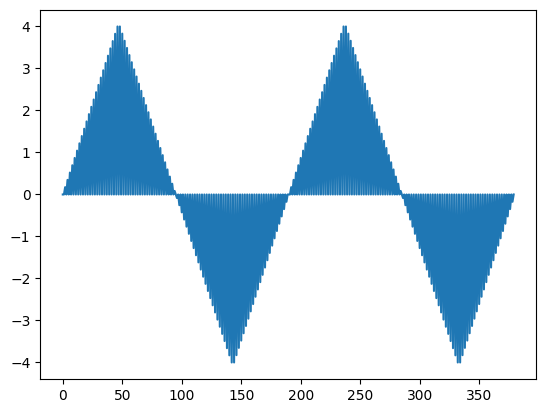

In [49]:
plt.plot(beparms.be_spectroscopy.DC_wave)

In [50]:
beparms.BE_num_bins*multiple*96*2

NameError: name 'multiple' is not defined

[]

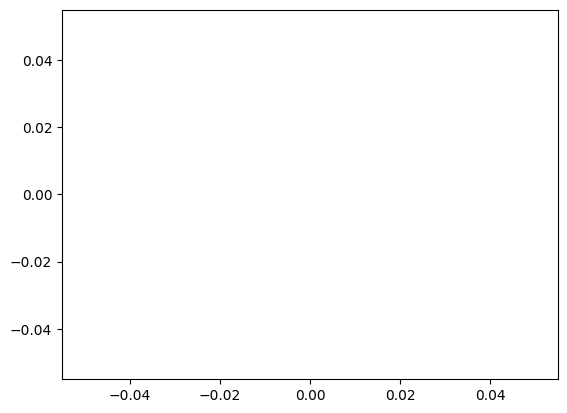

In [51]:
if beparms.spectroscopic_measurement_state == "on and off":
    multiple = 2
else: multiple = 1

plt.plot()

In [52]:
if beparms.spectroscopic_measurement_state == "on and off":
    vec = np.array([1,0])
elif beparms.spectroscopic_measurement_state == "on":
    vec = np.array([1])
elif beparms.spectroscopic_measurement_state == "off":
    vec = np.array([0])

vec_binned = data_converter.tile_and_offset(np.zeros(data_converter.be_measurement.BE_num_bins), vec)
vector_binned = data_converter.tile_and_offset(vec_binned, np.zeros(len(beparms.be_spectroscopy.DC_waveform)))

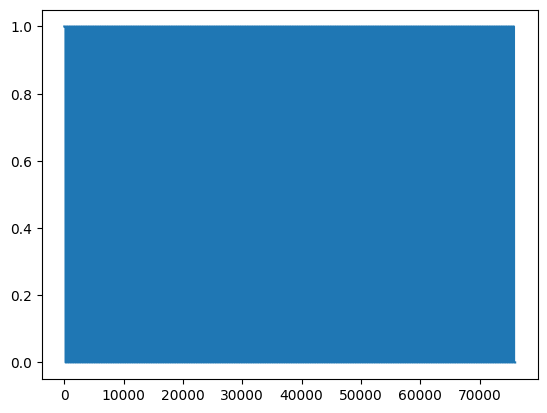

In [53]:
plt.plot(vector_binned)

In [54]:
import matplotlib.pyplot as plt
plt.plot(data_converter.cycle(beparms.BE_nums_bins*h))

AttributeError: 'BEMeasurement' object has no attribute 'BE_nums_bins'

In [57]:
import matplotlib.pyplot as plt
plt.plot(data_converter.field(beparms.BE_num_bins,beparms.spectroscopic_points*2))

AttributeError: 'DataConverter' object has no attribute 'field'

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain


bandwith = 330
DC_offset = []
for i in range(len(DC_waves)-1):
    if DC_waves[i] == 0:
        #DC_offset.extend([DC_waves[i-1]+((DC_waves[i+1]/1)*4)] * bandwith)
        pass
    else:

        DC_offset.extend([DC_waves[i]*4] * bandwith)

plt.plot(DC_waves)

plt.show()

 

plt.plot(DC_offset)

plt.show()

NameError: name 'DC_waves' is not defined

Initializing BEparams
0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt





TypeError: unsupported operand type(s) for //: 'int' and 'NoneType'

In [ ]:
BE = data_converter.BE_FFT(wave)
freq = data_converter.BE_frequencies(len(wave), 1e6)

(-549987.5, 549737.5)

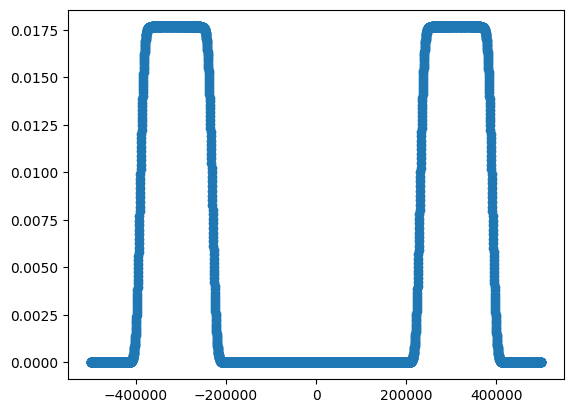

In [ ]:
plt.plot(freq, np.abs(BE),'o')
plt.xlim()

In [ ]:
# from dataclasses import dataclass 

# @dataclass
# class DataConverter:
#     be_measurement: object
    
#     def __post_init__(self):
#         pass
    
#     def get_spectroscopic_dimension(self):
#         # this calls all the subfunctions to get the spectroscopic dimension
#         pass

#     def update_binning(self, signal, **kwargs):

#         N = len(signal)
        
#         # get BE frequencies
#         freqs = self.BE_frequencies(N, self.be_measurement.AI_sample_rate)
        
#         if self.be_measurement.BE_num_bins is not None:
#             # get the masked regions
#             self.inds = self.extract_freq_range(freqs, self.be_measurement.BE_graph_range(multiple=1.05))
#             # Verify if number of bins is too large
#             if self.be_measurement.BE_num_bins > len(self.inds):
#                 raise ValueError("Number of bins is greater than the number of FFT points within the frequency range.")
#         else:
#             self.inds = np.where(freqs>=0)
            
#         freqs_filtered = freqs[self.inds]
        
#         self.binned_freqs = self.BE_bin(freqs_filtered, self.be_measurement.BE_num_bins)
            
    
#     def bin_signal(self, signal, **kwargs):
        
#         if not hasattr(self, 'inds'):
#             self.update_binning(signal, **kwargs)
        
#         # Compute the Normalized FFT
#         FFT_ = self.BE_FFT(signal)

#         # Filter the FFT
#         FFT_filtered = FFT_[self.inds]
        
#         binned_complex = self.BE_bin(FFT_filtered, self.be_measurement.BE_num_bins)

#         return binned_complex
       
#     @staticmethod
#     def BE_bin(signal, num_bins):
        
#         # Perform the binning
#         bin_size = len(signal) // num_bins
        
#         # Reshape and average
#         reshaped_signal = signal[:num_bins * bin_size].reshape(num_bins, -1)
#         avg_signal = np.mean(reshaped_signal, axis=1)
        
#         return avg_signal

#     @staticmethod
#     def BE_frequencies(number_of_points, sampling_frequency):
        
#         freqs = np.fft.fftfreq(number_of_points, 1/sampling_frequency)
#         freqs = np.fft.fftshift(freqs)
        
#         return freqs
    
#     @staticmethod
#     def BE_FFT(signal):
        
#         FFT_ = np.fft.fft(signal) / len(signal)  # FFT and normalization
#         FFT_ = np.fft.fftshift(FFT_) # Shift FFT and keep one side
#         return FFT_
    
    

#     # def BE_freq_bins(self, **kwargs):
#     #     BE_wave = self.be_measurement.get_simulated_BE_measurement()
#     #     freqs = np.fft.fftfreq(len(BE_wave), 1/self.be_measurement.AI_sample_rate)
#     #     self.ind = self.extract_freq_range(freqs, **kwargs)
#     #     self.freqs = freqs[self.ind]

#     @staticmethod
#     def extract_freq_range(freqs, _range):
#         range_ = (_range[0], _range[1])
#         indices = np.where((freqs >= range_[0]) & (freqs <= range_[1]))[0]
#         return indices
        
#     @property
#     def frequency_dimension(self):
#         # this gets the frequency bins from the FFT
#         pass
    
#     @property
#     def DC_offset_dimension(self):
#         pass
    
#     def get_field_dimension(self):
#         pass
    
#     @property
#     def cycle_dimension(self):
#         pass
    
#     @property
#     def binned_freqs(self):
#         return self._binned_freqs
    
#     @binned_freqs.setter
#     def binned_freqs(self, value):
#         self._binned_freqs = value
    

    


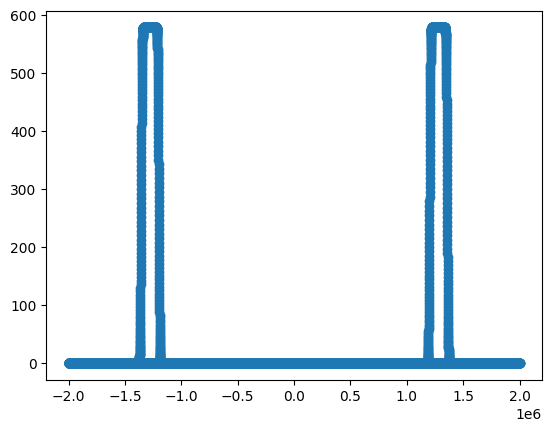

In [ ]:
import numpy as np
fft_vals = np.fft.fft(wave)
fft_shift = np.fft.fftshift(fft_vals)
freqs = np.fft.fftfreq(len(wave),1/4e6)
# Shift the FFT values so that the center frequency is at 0 Hz
freqs = np.fft.fftshift(freqs)
plt.plot(freqs, np.abs(fft_shift),'o')

In [ ]:
channel = h5_

In [ ]:
channel["Spectroscopic_Values"]

NameError: name 'channel' is not defined

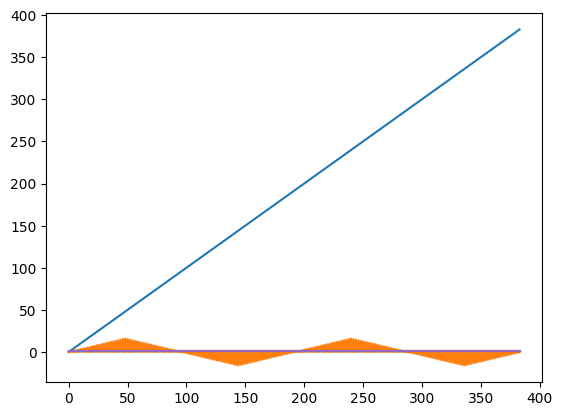

In [ ]:
plt.plot(channel['UDVS'])

In [ ]:
file_path = 'testing.h5'
h5s_file = h5py.File(file_path, mode='w')

In [36]:
# creates the measurement group
h5s_meas_group = sidpy.prov_utils.create_indexed_group(h5s_file, 'Measurement')
h5s_chan_group = sidpy.prov_utils.create_indexed_group(h5s_meas_group, 'Channel')

NameError: name 'sidpy' is not defined

In [ ]:
## TODO need to fix these based on values --- 
sidpy.hdf_utils.write_simple_attrs(h5s_meas_group, {'BE_actual_duration_[s]': 0.004,
                                                'BE_amplitude_[V]': 1,
                                                'BE_auto_smoothing': 'auto smoothing on',
                                                'BE_band_edge_smoothing_[s]' : 4832.1,
                                                'BE_band_edge_trim' : 0.094742,
                                                'BE_band_width_[Hz]' : 200000,
                                                'BE_bins_per_band' : 0,
                                                'BE_center_frequency_[Hz]' : 1310000,
                                                'BE_desired_duration_[s]' : 0.004,
                                                'BE_phase_content' : 'chirp-sinc hybrid',
                                                'BE_phase_variation' : 1,
                                                'BE_points_per_BE_wave' : 0,
                                                'BE_repeats' : 4,
                                                'FORC_V_high1_[V]' : 1,
                                                'FORC_V_high2_[V]' : 10,
                                                'FORC_V_low1_[V]' : -1,
                                                'FORC_V_low2_[V] ': -10,
                                                'FORC_num_of_FORC_cycles' : 1,
                                                'FORC_num_of_FORC_repeats' : 1,
                                                'File_MDAQ_version' : 'MDAQ_VS_090915_01', 
                                                'File_date_and_time' : '18-Sep-2015 18:32:14', 
                                                'File_file_name' : 'SP128_NSO',
                                                'File_file_path' : 'testing',
                                                'File_file_suffix' : 99,
                                                'IO_AO_amplifier' : 10,
                                                'IO_AO_range_[V]' : '+/- 10',
                                                'IO_Analog_Input_1' : '+/- .1V, FFT', 
                                                'IO_Analog_Input_2' : 'off', 
                                                'IO_Analog_Input_3' : 'off',
                                                'IO_Analog_Input_4' : 'off',
                                                'IO_DAQ_platform' : 'NI 6115',
                                                'IO_rate_[Hz]' : 4000000,
                                                'VS_amplitude_[V]' : 16, 
                                                'VS_cycle_fraction' : 'full',
                                                'VS_cycle_phase_shift' : 0,
                                                'VS_measure_in_field_loops' : 'in and out-of-field',
                                                'VS_mode' : 'DC modulation mode',
                                                'VS_number_of_cycles' : 2,
                                                'VS_offset_[V]' : 0,
                                                'VS_read_voltage_[V]' : 0,
                                                'VS_set_pulse_amplitude[V]' : 0,
                                                'VS_set_pulse_duration[s]' : 0.002,
                                                'VS_step_edge_smoothing_[s]' : 0.001,
                                                'VS_steps_per_full_cycle' : 96,
                                                'data_type' : 'BEPSData', 
                                                'grid_/single' : 'grid',
                                                'grid_contact_set_point_[V]' : 1,
                                                'grid_current_col' : 1,
                                                'grid_current_row' : 1,
                                                'grid_cycle_time_[s]' : 10,
                                                'grid_measuring' : 0,
                                                'grid_moving ': 0,
                                                'grid_num_cols' : 60,
                                                'grid_num_rows' : 60,
                                                'grid_settle_time_[s]' : 0.15,
                                                'grid_time_remaining_[h;m;s]' : 10,
                                                'grid_total_time_[h;m;s]' : 10,
                                                'grid_transit_set_point_[V]' : 0.1,
                                                'grid_transit_time_[s]' : 0.15,
                                                'num_bins' : 165,
                                                'num_pix' : 3600,
                                                'num_udvs_steps' : 384})